# Agenda
---
1. Basic NumPy operations
2. Data processing operations
3. Linear algebra operations

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Introduction
The numpy package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good.

In [4]:
from numpy import *
import numpy as np

In [5]:
# First 20 countries with employment data
countries = np.array([
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
])

# Employment data in 2007 for those 20 countries
employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

twod_array = np.array([[1, 2, 3], [5, 6, 7]])

# shape
Getting the information shape of the data

In [6]:
print(countries.shape)
print(employment.shape)
print(twod_array.shape)

(20,)
(20,)
(2, 3)


# Indexing and Slicing
- Getting elements from array by querying w.r.t. index
- Slicing an array with given indices

In [7]:
# List of countries
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina']


In [8]:
print("Country at index 3: ", countries[3])

# Slicing country array
print("Countries within index 1, 4", countries[1:5])

Country at index 3:  Angola
Countries within index 1, 4 ['Albania' 'Algeria' 'Angola' 'Argentina']


### Note
Slicing creates a view. And if we update the view, the original array will get updated

In [9]:
countries_view = countries[1:5]
countries_view[1] = "India"
print(countries)

['Afghanistan' 'Albania' 'India' 'Angola' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina']


### Working with 2D arrays

In [10]:
print(twod_array)

[[1 2 3]
 [5 6 7]]


In [11]:
# 2D array row
print("Row at index 1: ", twod_array[1])

# 2D array single element
print("Element at index (1, 1): ", twod_array[1, 1])

# 2D array single column
print("Column at index 1: ", twod_array[:,1])

Row at index 1:  [5 6 7]
Element at index (1, 1):  6
Column at index 1:  [2 6]


In [33]:
# Slicing 2D array
twod_array[1:2, 1]

array([6])

# Data processing operations
Numpy provides a number of functions to calculate statistics of datasets in arrays.

In [12]:
data = genfromtxt('../data/stockholm_td_adj.dat')
data.shape

(77431, 7)

In [13]:
!head ../data/stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


### Columns description

    | Year  | Month | Day | Temperature1 | Temperature2 | Temperature 3 | Region id |
    | 1800  | 1     | 1   | -6.1         | -6.1         |    -6.1       | 1         |

**Mean**

In [14]:
# the temperature data is in column 3
mean(data[:,3])

6.1971096847515854

**Standard Deviation and Variance**

In [15]:
std(data[:,3]), var(data[:,3])

(8.2822716213405734, 68.596023209663414)

**min and max**

In [16]:
# lowest daily average temperature
data[:,3].min()

-25.800000000000001

In [52]:
# highest daily average temperature
data[:,3].max()

28.300000000000001

In [54]:
data[:,0]+data[:,1]/12.0+data[:,2]/365

array([ 1800.08607306,  1800.08881279,  1800.09155251, ...,  2012.07945205,
        2012.08219178,  2012.08493151])

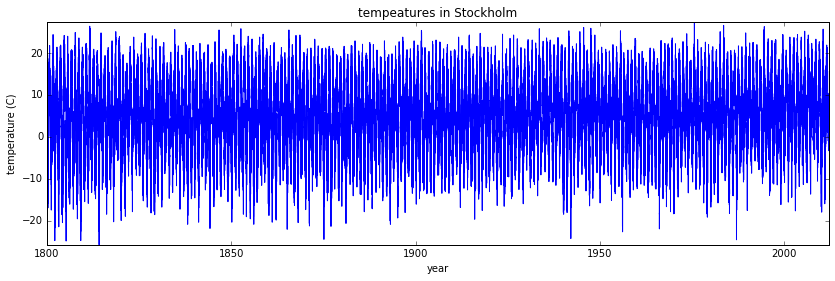

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

# Linear algebra operations


### Scalar-array operations

In [17]:
v1 = arange(0, 5)
print("V1: ", v1)
v1 * 2

V1:  [0 1 2 3 4]


array([0, 2, 4, 6, 8])

In [72]:
A = np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [71]:
A * A

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

### Transponse

In [74]:
A.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

### Matrix multiplication

In [78]:
np.matmul(A, A)

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

## Simple Use Case

In [18]:
print(countries)
print(employment)

['Afghanistan' 'Albania' 'India' 'Angola' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina']
[ 55.70000076  51.40000153  50.5         75.69999695  58.40000153
  40.09999847  61.5         57.09999847  60.90000153  66.59999847
  60.40000153  68.09999847  66.90000153  53.40000153  48.59999847
  56.79999924  71.59999847  58.40000153  70.40000153  41.20000076]


In [19]:
# Also called as z-value
std_scores = (employment - employment.mean())/employment.std()
std_scores

array([-0.31965231, -0.780123  , -0.87650077,  1.82207181, -0.03051941,
       -1.99019768,  0.30144772, -0.16973184,  0.23719615,  0.84758731,
        0.18365304,  1.00821665,  0.87971351, -0.56595055, -1.07996476,
       -0.20185762,  1.38301845, -0.03051941,  1.2545153 , -1.87240259])

In [20]:
from operator import itemgetter
country_with_employment = zip(countries, std_scores)
list(country_with_employment)

[('Afghanistan', -0.31965230838385678),
 ('Albania', -0.78012299922067718),
 ('India', -0.87650076677513644),
 ('Angola', 1.8220718105628031),
 ('Argentina', -0.030519414789863319),
 ('Armenia', -1.9901976846285574),
 ('Australia', 0.30144772304471396),
 ('Austria', -0.16973183672515221),
 ('Azerbaijan', 0.23719615107828448),
 ('Bahamas', 0.84758731357380945),
 ('Bahrain', 0.18365303790465493),
 ('Bangladesh', 1.0082166530946981),
 ('Barbados', 0.87971350916183921),
 ('Belarus', -0.56595054652615895),
 ('Belgium', -1.0799647606768548),
 ('Belize', -0.20185762217293615),
 ('Benin', 1.3830184453101051),
 ('Bhutan', -0.030519414789863319),
 ('Bolivia', 1.2545153013772461),
 ('Bosnia and Herzegovina', -1.8724025904191139)]

**Getting the country with max std employments**

In [27]:
from operator import itemgetter
country_with_employment = zip(countries, std_scores)
max(list(country_with_employment), key=itemgetter(1))

('Angola', 1.8220718105628031)